# Tello Vision Telemetry Lab

## Person Detection Inspector 

### Description: inspect person detection telemetry.
See data explanation at [the end of the notebook](#data-explanation).

### Index:
* [Telemetry Analysis Setup](#analysis-setup)
* [Detected Person Count vs time](#person-count)
* [Detected Person Confidence vs time](#person-confidence)
* [Detected Face Radius vs time](#face-radius)
* [Detected Person Confidence vs Face Radius](#confidence-radius)
* [Detected Face Image Position](#face-position)
* [Telemetry Data Explanation](#data-explanation)
* [Telemetry Data Filtering](#data-filtering)


### Telemetry Analysis Setup <a class="anchor" id="analysis-setup"></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
#Read data
df = pd.read_csv('data/tv_telemetry_210325_122021_demo_trackMode.txt',decimal=".")
df.head(2)

,timestamp,trackMode,telSeqId,personCount,personConfidence,faceXPx,faceYPx,faceRadiusPx,angle_err,estimatedDistance,...,Uy,pitch,roll,yaw,vx,vy,vz,tof,batt,temp
0,41058,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,10,76,75
1,41160,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,10,76,75


In [8]:
#Extract data columns
timestamp=df["timestamp"]
trackMode=df["trackMode"]
telSeqId=df["telSeqId"]
personCount=df["personCount"]
personConfidence=df["personConfidence"]
faceXPx=df["faceXPx"]
faceYPx=df["faceYPx"]
faceRadius=df["faceRadiusPx"]
theta=df["angle_err"]
estimatedDistance=df["estimatedDistance"]
yPos=df["estimatedYPos"]
Uyaw=df["Uyaw"]
Ux=df["Ux"]
Uy=df["Ux"]
Uz=df["Uz"]
pitch=df["pitch"]
roll=df["roll"]
yaw=df["yaw"]
vx=df["vx"]
vy=df["vy"]
vz=df["vz"]
tof=df["tof"]
batt=df["batt"]
temp=df["temp"]

In [9]:
#Figures dpi
dpiSelected=72

### Detected Person Count vs time <a class="anchor" id="person-count"></a>

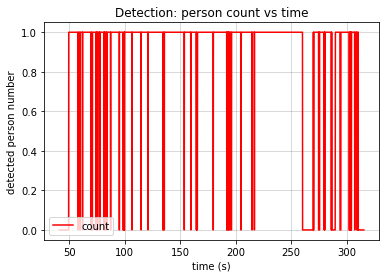

In [5]:
plt.plot(timestamp/1000,personCount,'r')
plt.xlabel('time (s)')
plt.ylabel('detected person number')
plt.title('Detection: person count vs time')
plt.legend(['count'],loc='lower left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/detection/person-count.jpg",dpi=dpiSelected)
plt.show()

### Detected Person Confidence vs time <a class="anchor" id="person-confidence"></a>


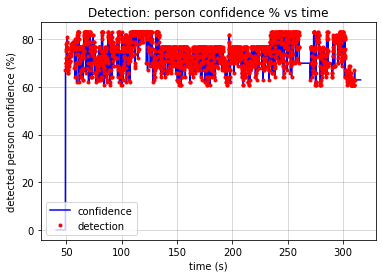

In [8]:
plt.plot(timestamp/1000,personConfidence,'b')
plt.plot(timestamp[personCount>0]/1000,personConfidence[personCount>0],'r.')
plt.xlabel('time (s)')
plt.ylabel('detected person confidence (%)')
plt.title('Detection: person confidence % vs time')
plt.legend(['confidence','detection'],loc='lower left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/detection/detection-confidence.jpg",dpi=dpiSelected)
plt.show()

### Detected Face Radius vs time <a class="anchor" id="face-radius"></a>

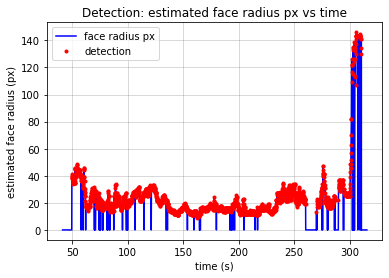

In [12]:
plt.plot(timestamp/1000,faceRadius,'b')
plt.plot(timestamp[personCount>0]/1000,faceRadius[personCount>0],'r.')
plt.xlabel('time (s)')
plt.ylabel('estimated face radius (px)')
plt.title('Detection: estimated face radius px vs time')
plt.legend(['face radius px','detection'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/detection/face-radius.jpg",dpi=dpiSelected)
plt.show()

### Detected Person Confidence vs Face Radius <a class="anchor" id="confidence-radius"></a>

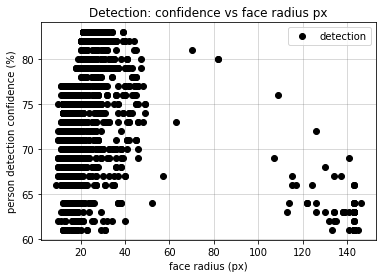

In [13]:
plt.plot(faceRadius[personCount>0],personConfidence[personCount>0],'ko')
plt.xlabel('face radius (px)')
plt.ylabel('person detection confidence (%)')
plt.title('Detection: confidence vs face radius px')
plt.legend(['detection'],loc='upper right')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/detection/radius-confidence.jpg",dpi=dpiSelected)
plt.show()

### Detected Face Image Position <a class="anchor" id="face-position"></a>

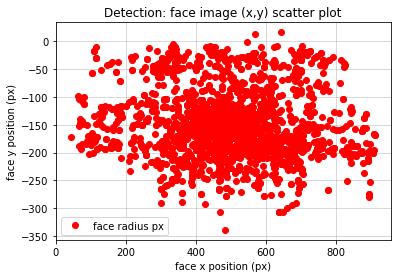

In [11]:
plt.plot(faceXPx[personCount>=1],-faceYPx[personCount>=1],'ro')
plt.xlabel('face x position (px)')
plt.ylabel('face y position (px)')
plt.title('Detection: face image (x,y) scatter plot')
plt.legend(['face radius px','detection'],loc='lower left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/detection/face-image.jpg",dpi=dpiSelected)
plt.show()

## Telemetry Data Explanation <a class="anchor" id="data-explanation"></a>

### timestamp 
Data timestamp (milliseconds).

### trackMode
Tracking Mode coded as follows:

0 -> None, 
1 -> Spotlight,
2 -> Follow,
3 -> Orbit, 
4 -> Profile, 
5 -> Party,
6 -> Forward with person avoidance.

### telSeqId
An incremental number used to manually mark flight phases. Use the Tello Vision 1D app button "Tel ID ++" to mark sequences of interest.

### personCount
Detected person count.

### personConfidence
Detection confidence for the foreground person (%).

### faceXPx, faceYPx, faceRadiusPx
Detection center and apparent face radius for the foreground person (pixels).

### angle_err
Horizontal angle error between the detected face and the center of the image (degrees)

### estimatedDistance
3D Distance between the drone and the detected face (cm).

### estimatedXPos, estimatedYPos, estimatedZPos
estimatedDistance decomposed in the (X,Y,Z) drone frame reference (cm).

X is in the drone right direction, Y is in the drone down direction, Z is in the drone forward direction.

### Uyaw, Uz, Ux, Uy
Speed commands sent to the drone (approximated deg/s and cm/s)

### pitch, roll, yaw
Eulerian angles from the IMU (degrees).

### vx, vy, vz
Velocities from the IMU (decimeter/s).

X is drone's initial forward direction, Y is drone's initial right direction, Z is drone's down direction.

### tof
Drone height from the Time Of Flight sensor (cm).

### batt
Drone battery level (%).

### temp
Drone temperature (°C).

## Telemetry Data Filtering <a class="anchor" id="data-filtering"></a>
Displaying many minutes of telemetry data all in the same plot can be difficult to interpret.
The key is to filter and select data to make the analysis simpler.
It is possible to leverage Python powerful Pandas Data Analysis Library and Tello Vision Telemetry Lab data columns definition.
For example, the trackMode column classifies data by the flight tracking mode active in each moment.
Autonomous tracking modes are coded as follows:
0 -> None, 
1 -> Spotlight,
2 -> Follow,
3 -> Orbit, 
4 -> Profile, 
5 -> Party,
6 -> Forward with person avoidance.

The following lines  of code:

*tofFollow=(tof[trackMode==2])*

*tofOrbit=(tof[trackMode==3])*

select only Time of Flight data of the Follow mode and the Orbit mode giving the possibility to plot them in two separate figures.
